 <font size="5"><b>OPIS ZBIORY DANYCH. CECHY</b></font>


Zbiór danych: <b>kc_house_data.csv (King County Housing) </b>
<br>
Rozmiar danych: 21x21613
<br>
Teza/pytanie: <b>Jakie są ceny sprzedaży mieszkań w hrabstwie King w USA na przełomie 05.2014 -05.2014 roku.</b> Przewidywanie cen mieszkań na podstawie dostarczonych danych.
<br>

<b>Krótki opis:</b>
<br>
Ten zbiór danych zawiera ceny sprzedaży domów w hrabstwie King w USA. Obejmuje domy sprzedane od maja 2014 do maja 2015.
<br>
<b>Opis kolumn:</b>
<br>
id - Unikalny numer ID transakcji
<br>
date - Data sprzedazy
<br>
<b>price -Cena sprzedazy</b>
<br>
bedrooms - Ilosc sypialni
<br>
bathrooms - Liczba lazienek
<br>
sqft_living - Powierzchnia mieszkalna
<br>
sqft_lot - Powierzchnia ogólna 
<br>
floors - Liczba pieter
<br>
waterfront - Czy mieszkanie wychodzilo na nabrzeze czy nie
<br>
view - Jak dobry widok nieruchomosci
<br>
condition - Kondycja budnku w skali 1-5
<br>
grade - Ocena w skali 1-13 okreslajaca jak dobrze zostal wykonany budynek
<br>
sqft_above - Powierzchnia powierzchni wewnętrznej przestrzeni mieszkalnej nad poziomem gruntu
<br>
sqft_basement - Kwadratowy obszar wnętrza przestrzeni mieszkalnej poniżej poziomu gruntu
<br>
yr_built - Rok budowy
<br>
yr_renovated - Rok ostatniej renowacji
<br>
zipcode - Kod pocztowy
<br>
lat - Szerokość geo.
<br>
long - Długość geo.
<br>
sqft_living15 - Powierzchnia wnętrza mieszkań dla najbliższych 15 sąsiadów
<br>
sqft_lot15 - Powierzchnia wnętrza mieszkań dla najbliższych 15 sąsiadów

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

<font size="5"><b>BADANIA EKSPLORACYJNE EDA</b></font>

In [2]:
housing_df = pd.read_csv("kc_house_data.csv")
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<b>Załadowanie danych</b>

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<b>Dane zawieraja 21 kolumn z ktorych wszystkie wydaja sie byc uzyteczne (oprocz ID). Wszystkie kloumny sa typu liczbowego z wyjatkiem kolumny date ktora jest typu object. Rozmiar danych to 21613 wierszy.</b>

In [4]:
#usuniecie kolumny ID ktora nic nie wnosi
housing_df = housing_df.drop('id', axis=1)

#zamiana kolumny daty na 3 kolumny year/month/day
housing_df['date'] = pd.to_datetime(housing_df['date'])
housing_df['year'] = housing_df['date'].apply(lambda x : x.year)
housing_df['month'] = housing_df['date'].apply(lambda x : x.month)
housing_df['day'] = housing_df['date'].apply(lambda x : x.day)

#usuniecie kolumny date ktora jest juz niepotrzebna
housing_df = housing_df.drop('date', axis=1)

<b>Usunięcie kolumni ID oraz zamiana date na 3 kolumny liczbowe (rok, miesiac, rok).
Podstawowym krokiem przed badaniem korelacji między kolumnami jest pozbycie się zbędnych kolumn oraz zamiana wszystkic kolumn na wartości typu liczbowego.</b>

In [5]:
#Jezeli podany jest rok odnowy budynku to dajemy wartosc 1 jesli nie to zostaje 0
housing_df['yr_renovated'].loc[(housing_df['yr_renovated'] > 0)] = 1

<b>Kolumna yr_renovated to kolumna podająca rok renowacji budynku. Jeśli oczywiście tej renowacji został poddany, jeśli nie to przyjmuje wartość 0. Po przejrzeniu danych zauważyłem, że znaczna część wierszy posiada wartość zerową co za tym idzie sam rok odnowienia budynku nie jest dla nas sam w sobie istotny, dlatego postanowilem zamienic charakter tej kolumny na binarny tzn. wartosci w kolumnie beda albo 0 albo 1 (0 - nie byl odnawiany / 1 - zostal poddany renowacji).</b>

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

<b>Prezentacja danych gotowych do dalszego badania. Wszystkie komórki są zapełnione oraz wszystkie typy zmiennych są liczbowe. Z tak przygotowanymi danymi możemy przejść do badania korelacji.</b>

<b>Przedstawienie graficzne korelacji między kolumnami przy użyciu macierzy korelacji</b>

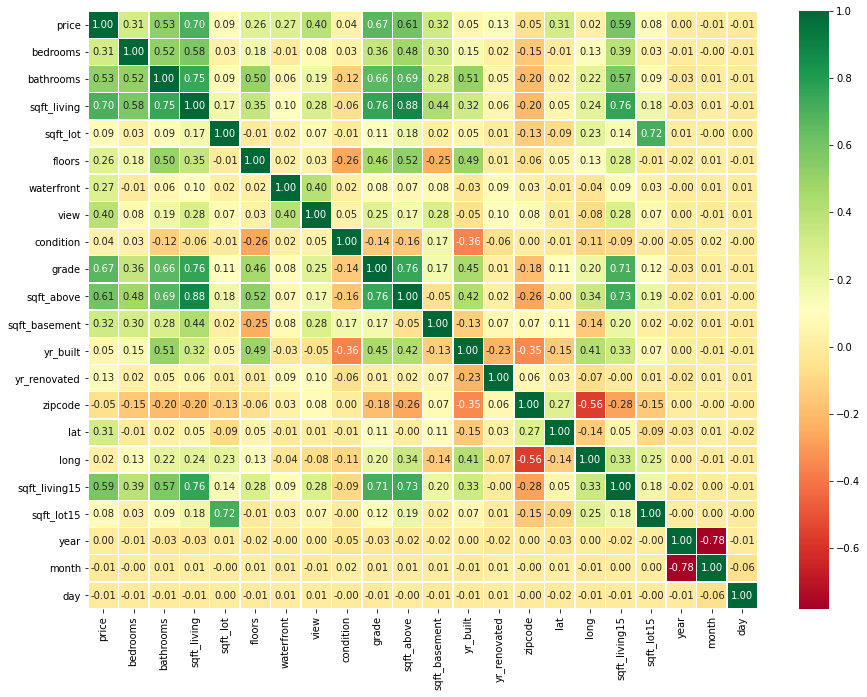

In [7]:
fig, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(housing_df.corr(),annot=True, fmt=".2f", linewidths=.5, ax=ax,cmap='RdYlGn')
plt.show()

<b>Istotną częścią macierzy jest dla nas pierwszy wiersz który odnosi się do ceny (Price). Jak możemy zauważyć najsilniejsza koleracja jest zaznaczona kolorem czerownym lub zielonym - czym mocniejszy odcien tym silniejsza korelacja. Od razu mozemy zauwazyc, ze na cene slaby wplyw maja utworzone przez nas kolumny (year, month, day) które mają wartość korelacji bliską 0. </b>

In [8]:
def aproximate(column1, column2):
    m, b = np.polyfit(housing_df[column1], housing_df[column2], 1)
    x_2 = sorted(housing_df[column1])[len(housing_df[column1])-1]
    x_1 = sorted(housing_df[column1])[0]
    return ([x_1,x_2],[m * x_1 + b, m * x_2 + b])

<b>Funkcja pomocnicza do wyznaczania prostej aproksymacyjnej na poniższych histogramach.</b>

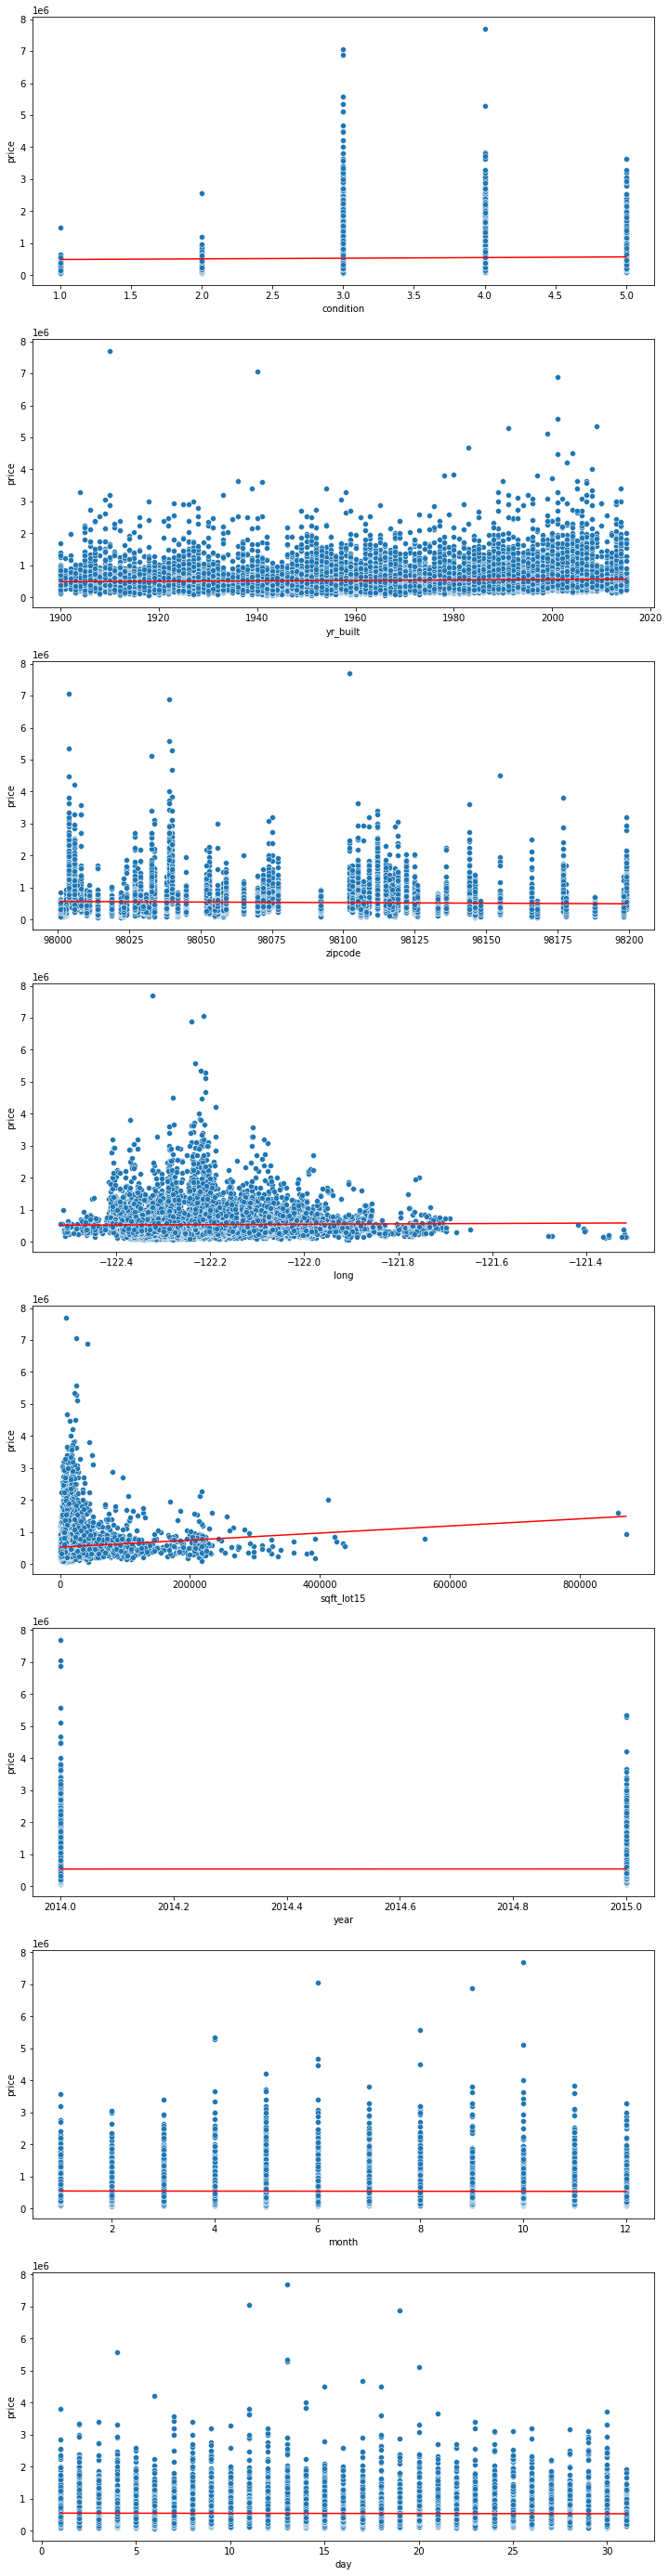

In [9]:
fig, ax= plt.subplots(figsize=(12,50), ncols=1, nrows=8)

sns.scatterplot(x="condition", y="price",data=housing_df, ax=ax[0])
x_ap, y_ap = aproximate("condition","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[0],color='red')

sns.scatterplot(x="yr_built", y="price",data=housing_df, ax=ax[1])
x_ap, y_ap = aproximate("yr_built","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[1],color='red')

sns.scatterplot(x="zipcode", y="price",data=housing_df, ax=ax[2])
x_ap, y_ap = aproximate("zipcode","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[2],color='red')

sns.scatterplot(x="long", y="price",data=housing_df, ax=ax[3])
x_ap, y_ap = aproximate("long","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[3],color='red')

sns.scatterplot(x="sqft_lot15", y="price",data=housing_df, ax=ax[4])
x_ap, y_ap = aproximate("sqft_lot15","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[4],color='red')

sns.scatterplot(x="year", y="price",data=housing_df, ax=ax[5])
x_ap, y_ap = aproximate("year","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[5],color='red')

sns.scatterplot(x="month", y="price",data=housing_df, ax=ax[6])
x_ap, y_ap = aproximate("month","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[6],color='red')

sns.scatterplot(x="day", y="price",data=housing_df, ax=ax[7])
x_ap, y_ap = aproximate("day","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[7],color='red')

plt.show();

<b>Powyżej przedstawione histogramy to zależności między zmiennymi a ceną (Price) W tej próbie został wybrane zmienne o stosunkowo niskiej korelacji odczytanej z macierzy. Łatwo to zauważyć patrząc na stopień nachylenia prostej aproksymacyjnej. Stosunkowo niski dla każdego z przedstawionych diagramów.</b>

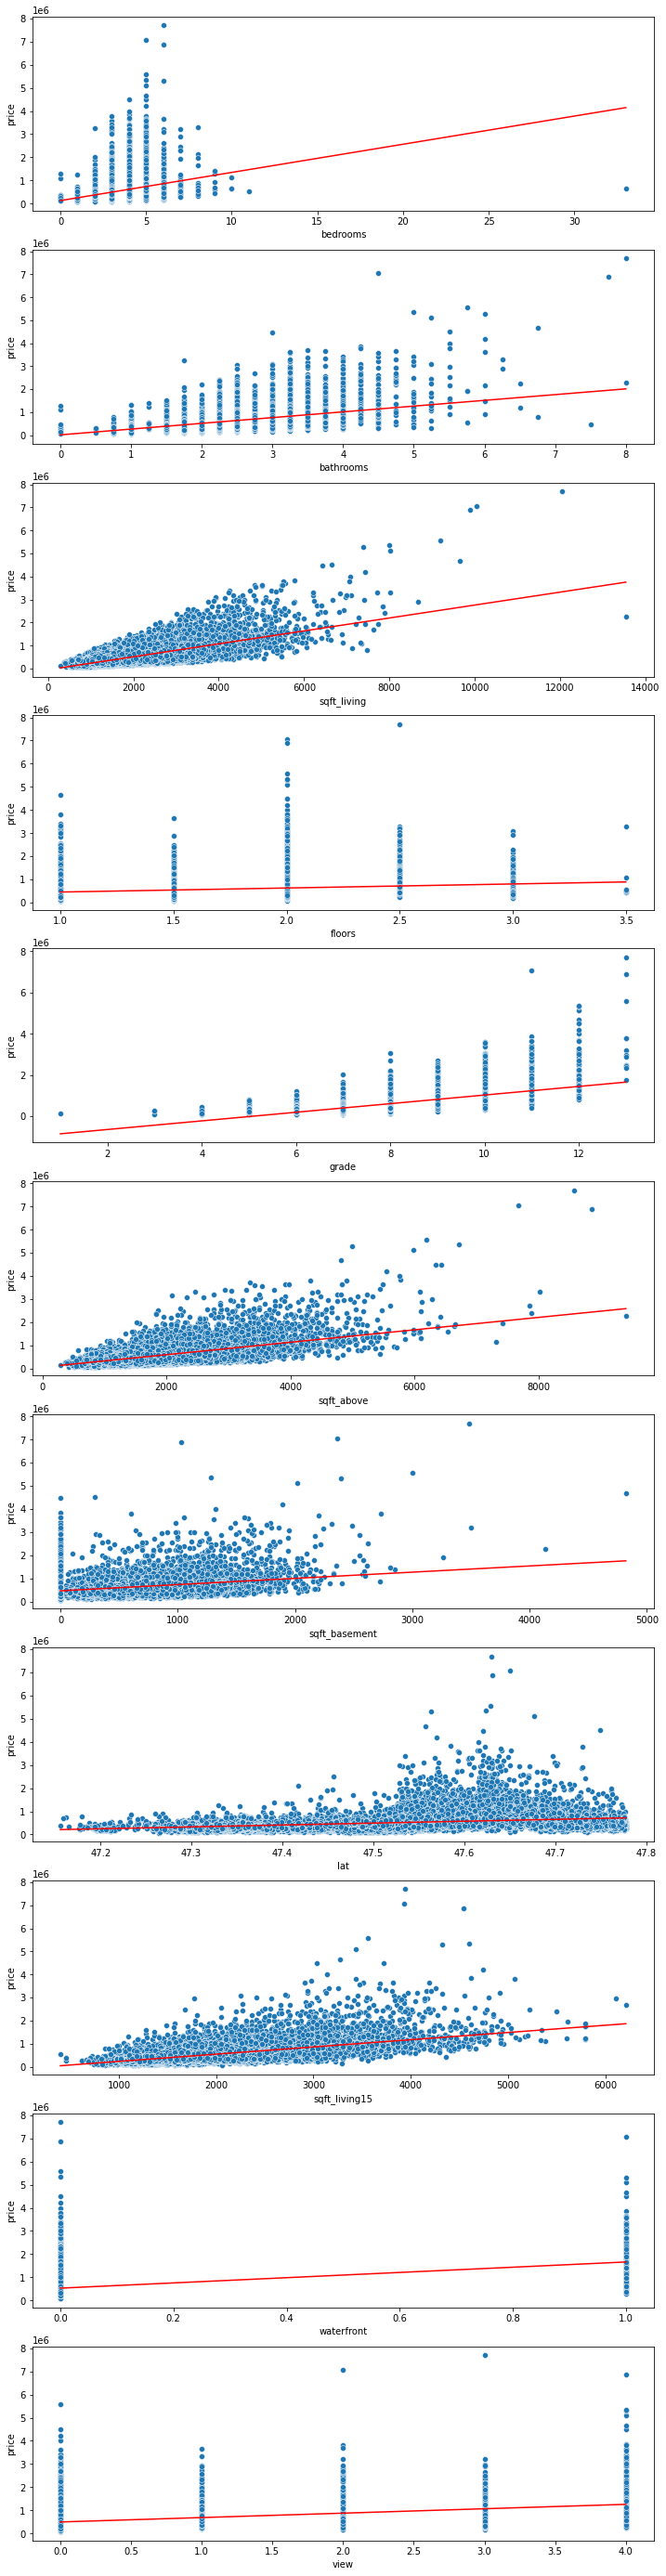

In [10]:
fig, ax= plt.subplots(figsize=(12,50), ncols=1, nrows=11)

sns.scatterplot(x="bedrooms", y="price",data=housing_df, ax=ax[0])
x_ap, y_ap = aproximate("bedrooms","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[0],color='red')

sns.scatterplot(x="bathrooms", y="price",data=housing_df, ax=ax[1])
x_ap, y_ap = aproximate("bathrooms","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[1],color='red')

sns.scatterplot(x="sqft_living", y="price",data=housing_df, ax=ax[2])
x_ap, y_ap = aproximate("sqft_living","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[2],color='red')

sns.scatterplot(x="floors", y="price",data=housing_df, ax=ax[3])
x_ap, y_ap = aproximate("floors","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[3],color='red')

sns.scatterplot(x="grade", y="price",data=housing_df, ax=ax[4])
x_ap, y_ap = aproximate("grade","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[4],color='red')

sns.scatterplot(x="sqft_above", y="price",data=housing_df, ax=ax[5])
x_ap, y_ap = aproximate("sqft_above","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[5],color='red')

sns.scatterplot(x="sqft_basement", y="price",data=housing_df, ax=ax[6])
x_ap, y_ap = aproximate("sqft_basement","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[6],color='red')

sns.scatterplot(x="lat", y="price",data=housing_df, ax=ax[7])
x_ap, y_ap = aproximate("lat","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[7],color='red')

sns.scatterplot(x="sqft_living15", y="price",data=housing_df, ax=ax[8])
x_ap, y_ap = aproximate("sqft_living15","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[8],color='red')

sns.scatterplot(x="waterfront", y="price",data=housing_df, ax=ax[9])
x_ap, y_ap = aproximate("waterfront","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[9],color='red')

sns.scatterplot(x="view", y="price",data=housing_df, ax=ax[10])
x_ap, y_ap = aproximate("view","price")
sns.lineplot(x=x_ap, y=y_ap, ax=ax[10],color='red')

plt.show();

<b>W odróżnieniu do powyższych wykresów tutaj w większości przypadków (róznych kolumn) widać wyraźne nachylenie prostej aproksymacyjnej co świadczy o wpływie na cene(Price) zgodnie z tym co odczytałem w macierzy korelacji.</b>

Dodatkowym spostrzeżeniem jest to, że dane nie są idealne. Na wykresie zalezności ilości sypialni od ceny możemy zauważyć, że jedno mieszkanie zostalo sprzedane po stosunkowo niskiej cene a miało ponad 30 sypialni. Moim zdaniem jest to ewidentny błąd w danych. Mimo to nie powinien on wpłynąć na wynik działania algorytmu.

In [11]:
housing_df = housing_df.drop(['year','month','day','condition','yr_built', 'long'],axis=1)

<b>Odrzucam zbędę kolumny, te o małym wpływie na cene. Data okazała się mieć niewieleki wpływ na ceny domów. Może to wynikać z faktu, że dane były zbierane przez stosunkowo niewielki okres dwóch lat. Pozostałe odrzucone kolumny okazały się nie mieć istotnego wpływu na cene co zobrazowałem na powyższych diagramach.</b>

<font size="5"><b>IMPLEMENTACJA 3 ALGORYTMÓW 
    <br>
    <br>
LinearRegression, RigeRegression, LassoRegression</b></font>

In [12]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  cross_val_score,cross_val_predict

<b>Obcięcie danych - aby lepiej przedstawić wykresy otrzymane z działania algorytmów zdecydowałem się na zawężenie zbioru danych. Liczba mieszkań przekraczająca 2mln jest nieznaczna na tle ilości wszystkich rekordów.</b>

In [13]:
housing_df = housing_df[housing_df["price"] < 2000000]

<b>Rozdzielenie danych na dwa zbiory oraz skalowanie.</b>

In [14]:
X_train = housing_df.drop('price',axis=1)
y_train = housing_df['price']

In [15]:
x_scaler = StandardScaler()

In [16]:
X_train = x_scaler.fit_transform(X_train)

<font size="5"><b>RIDGE REGRESSION</b></font>

In [17]:
ridge = Ridge(alpha=0.5)
print(cross_val_score(ridge, X_train, y_train, cv=5))
RidgeRegPred=cross_val_predict(ridge,X_train, y_train,cv=5)

[0.66902807 0.65928155 0.66704979 0.67425665 0.67233577]


Uzyskany procent poprawnych przewidywań dla algorytmu <b> ridge regression </b> jest na <b>poziomie 67%</b>

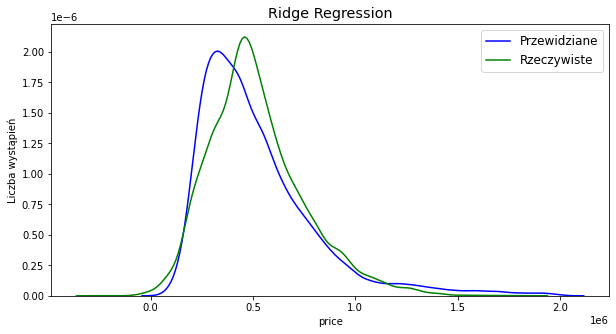

In [18]:
fig,ax=plt.subplots(figsize=(10, 5))
plt.rc('font', size=12)   
ax=sns.distplot(y_train,hist=False, label='Przewidziane',color='blue')
sns.distplot(RidgeRegPred, hist=False, label='Rzeczywiste', color='green', ax=ax)
plt.title("Ridge Regression")
plt.ylabel("Liczba wystąpień")
plt.legend()

<font size="5"><b>LINEAR REGRESSION</b></font>

In [19]:
linear_model = LinearRegression()
print(cross_val_score(linear_model, X_train, y_train, cv=5))
LinearRegPred=cross_val_predict(linear_model, X_train, y_train,cv=5)

[0.66896406 0.65926545 0.66705494 0.67418935 0.67234341]


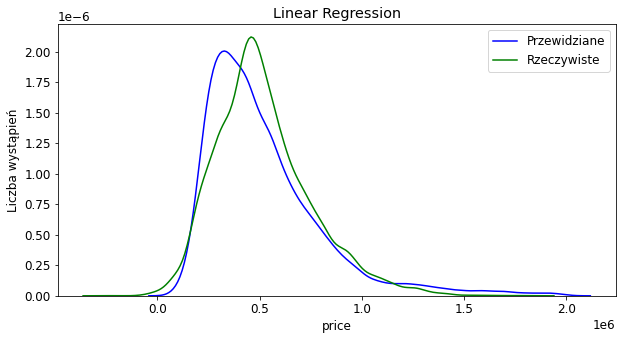

In [20]:
fig,ax=plt.subplots(figsize=(10, 5))
plt.rc('font', size=12)   
ax=sns.distplot(y_train,hist=False,label='Przewidziane',color='blue')
sns.distplot(LinearRegPred,hist=False,label='Rzeczywiste',color='green',ax=ax)
plt.title("Linear Regression")
plt.ylabel("Liczba wystąpień")
plt.legend()

Rówież podobny wynik osiągnąłem dla algorytmu <b>linear regression</b>. <b>Około 67%</b>

<font size="5"><b>LASSO REGRESSION</b>

In [21]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
print(cross_val_score(lasso,  X_train, y_train, cv=5))
LassoRegPred = cross_val_predict(lasso,  X_train, y_train,cv=5)

[0.66902672 0.65928102 0.66704928 0.67425605 0.67233807]


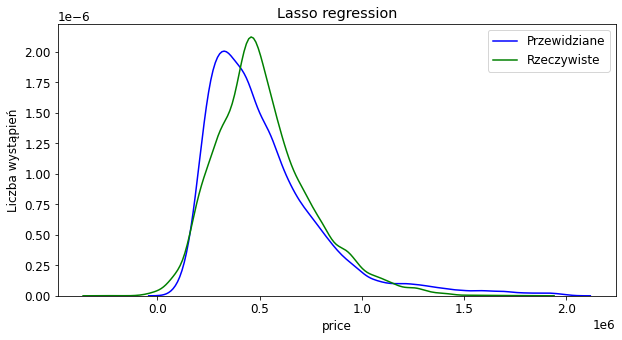

In [22]:
fig,ax=plt.subplots(figsize=(10, 5))
plt.rc('font', size=12)   
ax=sns.distplot(y_train,hist=False,label='Przewidziane',color='blue')
sns.distplot(LassoRegPred,hist=False,label='Rzeczywiste',color='green',ax=ax)
plt.title("Lasso regression")
plt.ylabel("Liczba wystąpień")
plt.legend()

Rówież podobny wynik osiągnąłem dla algorytmu <b> lasso regresji</b>. <b>Około 67%</b>

 <font size="5"><b>Dodatkowe algorytmy. Algorytmy drzewa decyzyjnego oraz lasu losowego</b></font>

<font size="5"><b>DECISSION TREE<b/></font>

In [23]:
decisionTree =DecisionTreeRegressor()
print(cross_val_score(decisionTree,  X_train, y_train,cv=5))
DecisionTreePred=cross_val_predict(decisionTree,  X_train, y_train,cv=5)

[0.71614946 0.74456429 0.7307433  0.73505307 0.71937541]


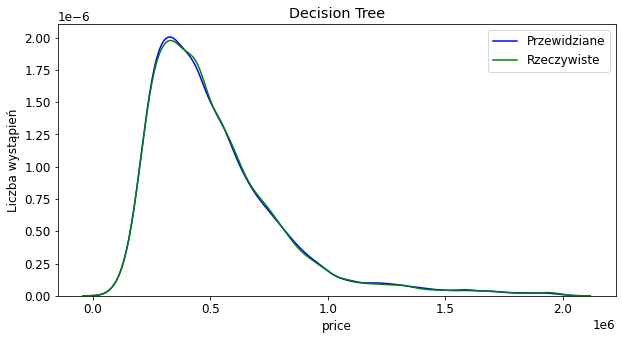

In [24]:
fig,ax=plt.subplots(figsize=(10, 5))
plt.rc('font', size=12)   
ax=sns.distplot(y_train,hist=False,label='Przewidziane',color='blue')
sns.distplot(DecisionTreePred,hist=False,label='Rzeczywiste',color='green',ax=ax)
plt.title("Decision Tree")
plt.ylabel("Liczba wystąpień")
plt.legend()

Zauważalnie lepszy wynik uzyskałem dla algorytmu <b>drzewa decyzyjnego</b> - co widać na wyrysowanym wykresie. Poziom <b>około 70%</b>

<font size="5"><b>RANDOM FOREST TREE<b/> </font>

In [25]:
randomForest=RandomForestRegressor(n_estimators=100, random_state = 42)
print(cross_val_score(randomForest, X_train, y_train,cv=5))
RandomForestPred=cross_val_predict(randomForest, X_train, y_train,cv=5)

[0.86023743 0.86532598 0.86038415 0.85576725 0.868461  ]


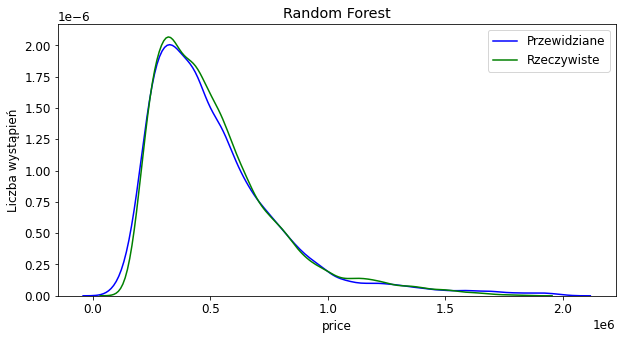

In [26]:
fig,ax=plt.subplots(figsize=(10, 5))
plt.rc('font', size=12)   
ax=sns.distplot(y_train,hist=False,label='Przewidziane',color='blue')
sns.distplot(RandomForestPred,hist=False,label='Rzeczywiste',color='green',ax=ax)
plt.title("Random Forest")
plt.ylabel("Liczba wystąpień")
plt.legend()


Ostatnim użytym algorytmem był algorytm <b>lasu losowego</b> która okazała się być <b>najskuteczniejsza</b>. Uzyskany wynik jest na <b>poziomie aż 85%</b>. Warto podkreślić, że algorytm ten ze względu na swoją specyfikacje wykonywał się w o wiele dłuzszym czasie niż pozostałe przedstawione algorytmy.

<b>Reasumując</b> uzyskane wyniki dla 3 algorytmów (linear/ridge/lasso regression) regresji zgodnie z moimi przewidywaniami okazały się niemal identyczne - różnice mogą wynikać głównie z dobrania różnych parametrów algorytmów. Poziom jaki udało mi się osiągnać dla tych algorytmów to 67% co jest wynikiem zadawalającym, chociaż na pewno możliwe byłoby osiągnięcie lepszych rezultatów. Kolejne dwa algorytmy jakie zaprezentowałem to algorytmy które nie były częścią tego przedmiotu. Algorytm te to algorytm drzewa decyzyjnego i lasu losowego w przypadku drzewa decyzyjnego osiągnąłem wynik na poziomie 69% a dla lasu losowego wynik 85% co jest wynikiem bardzo dobrym i znacznie wyższym niż dla algorytmów regresji.